In [11]:
import pandas as pd
from IPython.display import display
from PIL import Image
from PIL import Image
import os
import time as tm
import seaborn as sns
BASE_TRAIN_PATH = '../../datasets/covid/train'
BASE_TEST_PATH = '../../datasets/covid/test'

def dimensiones_imagenes(lista_imagenes):
    dimensiones = {
        'ancho': [],
        'alto': []
    }
    for imagen in lista_imagenes:
        img = Image.open(imagen)
        dimensiones['ancho'].append(img.size[0])
        dimensiones['alto'].append(img.size[1])
    return dimensiones
def guardar_imagenes(lista_imagenes, ruta_destino, w, h,debug_time=5):
    nuevos_nombres = []
    # eliminar contenido del directorio
    i = 0
    total = len(lista_imagenes)
    inicial = tm.time()
    for imagen in lista_imagenes:
        t_actual = tm.time()
        if t_actual - inicial > debug_time:
            inicial = t_actual
            print(f'{(i/total)*100}%')
        img = redimensionar_y_recortar(imagen, w)
        # Convertir la imagen a modo RGB si no lo está
        if img.mode != 'RGB':
            img = img.convert('RGB')
        # Obtener el nombre base del archivo sin extensión
        nombre_archivo = os.path.basename(imagen)
        nombre_sin_ext, ext = os.path.splitext(nombre_archivo)
        # Construir la nueva ruta con la extensión .jpg
        ruta_des_img = os.path.join(ruta_destino, f'{nombre_sin_ext}.jpg')
        nuevos_nombres.append(ruta_des_img)
        # Guardar la imagen en formato JPEG
        img.save(ruta_des_img, format='JPEG')
        i+=1
    return nuevos_nombres

def redimensionar_y_recortar(ruta_imagen, tamaño_cuadrado):
    imagen = Image.open(ruta_imagen)
    ancho_original, alto_original = imagen.size

    if ancho_original > alto_original:
        escala = tamaño_cuadrado / alto_original
    else:
        escala = tamaño_cuadrado / ancho_original

    nuevo_ancho = int(ancho_original * escala)
    nuevo_alto = int(alto_original * escala)

    imagen_redimensionada = imagen.resize((nuevo_ancho, nuevo_alto), Image.LANCZOS)

    izquierda = (nuevo_ancho - tamaño_cuadrado) // 2
    superior = (nuevo_alto - tamaño_cuadrado) // 2
    derecha = izquierda + tamaño_cuadrado
    inferior = superior + tamaño_cuadrado

    imagen_cortada = imagen_redimensionada.crop((izquierda, superior, derecha, inferior))
    return imagen_cortada


In [9]:
df_train = pd.read_csv('../../datasets/covid/train.txt',sep=' ')
df_test = pd.read_csv('../../datasets/covid/test.txt',sep=' ')

In [12]:
df_train['path'] = df_train['filename'].apply(lambda x: f'{BASE_TRAIN_PATH}/{x}')
df_test['path'] = df_test['filename'].apply(lambda x: f'{BASE_TEST_PATH}/{x}')

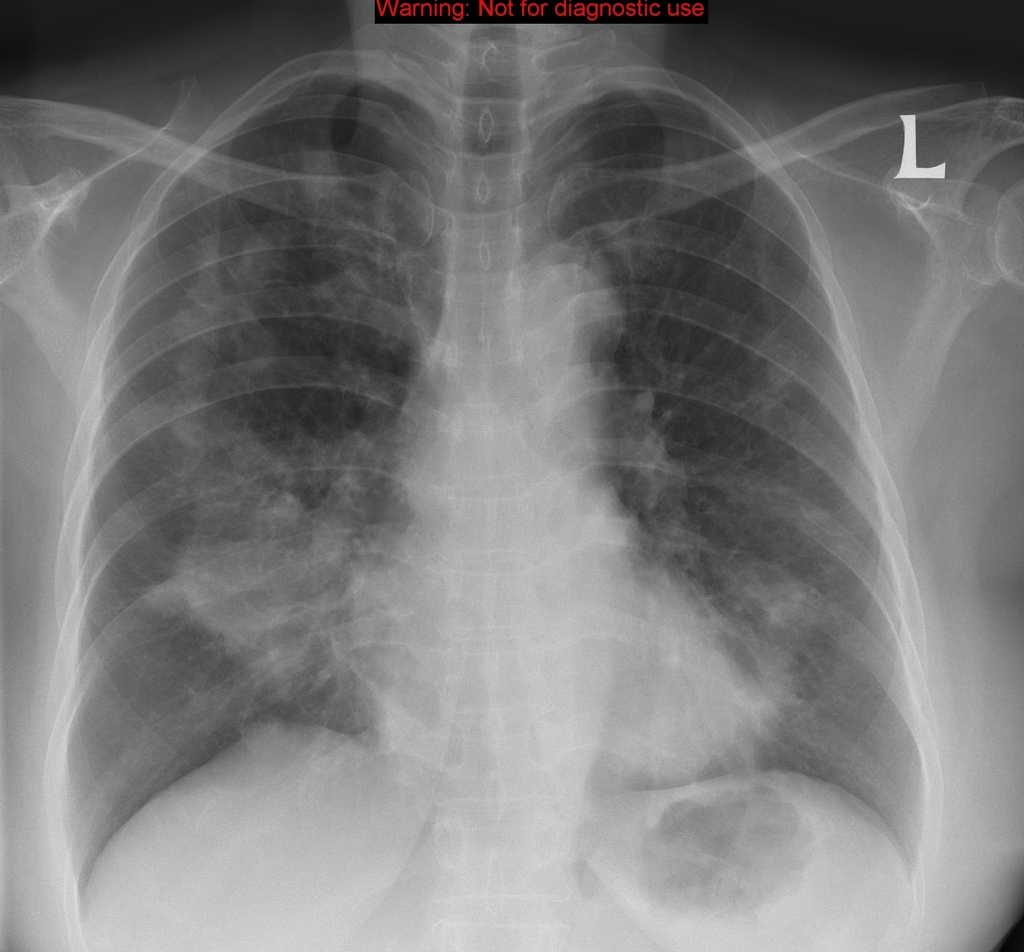

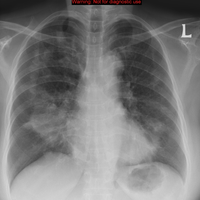

In [6]:
primer_imagen = df_train['path'].iloc[1]
img_normal = Image.open(primer_imagen)
img_redimiensionada = redimensionar_y_recortar(primer_imagen,200)
display(img_normal)
display(img_redimiensionada)

## Redimensionamiento

In [56]:
rutas_imagenes = df_train['path']
nuevos_nombres = guardar_imagenes(rutas_imagenes,'../../datasets/covid/train_2',300,300,debug_time=5)

0.5908963647348334%
2.191179287682537%
2.8012318936681253%
3.42896718388518%
3.98597173717637%
4.54297629046756%
5.1058750718359045%
5.661406068107806%
6.224304849476151%
6.78130940276734%
7.33684039903924%
7.898265623388297%
8.442008163505887%
9.003433387854944%
9.564858612204%
10.117442494437322%
10.668552819651357%
11.215242473807525%
11.769299913060136%
12.332198694428481%
12.895097475796828%
13.415263103605794%
13.969320542858407%
14.53369288124604%
15.09217099155652%
15.640334202731976%
16.187023856888143%
16.73371351104431%
17.270088266065457%
18.463669451689434%
20.255514787144687%
21.917687104902527%
23.55628251035174%
25.317183148401927%
27.02061506269985%
28.777095029692173%
30.552731237935255%
32.35194435848695%
34.12610700971074%
35.94005570045533%
36.653257297791136%
37.27804547396962%
37.92346344841814%
38.57919632200168%
39.220193625392334%
39.8597173717637%
40.45208729351783%
41.084243254792746%
41.725240558183394%
42.347081620323294%
42.97776402457893%
43.586343073545

In [57]:
df_train['path_redimensionada'] = nuevos_nombres

In [58]:
df_train.head()

,patient_id,filename,class,data_source,path,ancho,alto,path_redimensionada
0,379,1e64990d1b40c1758a2aaa9c7f7a85_jumbo.jpeg,negative,cohen,../../datasets/covid/train/1e64990d1b40c1758a2...,1024,912,../../datasets/covid/train_2/1e64990d1b40c1758...
1,379,7223b8ad031187d9a142d7f7ca02c9_jumbo.jpeg,negative,cohen,../../datasets/covid/train/7223b8ad031187d9a14...,1024,952,../../datasets/covid/train_2/7223b8ad031187d9a...
2,380,3392dc7d262e28423caca517f98c2e_jumbo.jpeg,negative,cohen,../../datasets/covid/train/3392dc7d262e28423ca...,977,1024,../../datasets/covid/train_2/3392dc7d262e28423...
3,380,ec3a480c0926ded74429df416cfb05_jumbo.jpeg,negative,cohen,../../datasets/covid/train/ec3a480c0926ded7442...,1024,902,../../datasets/covid/train_2/ec3a480c0926ded74...
4,382,a72aeb349a63c79ed24e473c434efe_jumbo.jpg,negative,cohen,../../datasets/covid/train/a72aeb349a63c79ed24...,1024,1024,../../datasets/covid/train_2/a72aeb349a63c79ed...


In [59]:
df_train_reducido = df_train[['path_redimensionada','class','patient_id']]

In [60]:
df_train_reducido.head()

,path_redimensionada,class,patient_id
0,../../datasets/covid/train_2/1e64990d1b40c1758...,negative,379
1,../../datasets/covid/train_2/7223b8ad031187d9a...,negative,379
2,../../datasets/covid/train_2/3392dc7d262e28423...,negative,380
3,../../datasets/covid/train_2/ec3a480c0926ded74...,negative,380
4,../../datasets/covid/train_2/a72aeb349a63c79ed...,negative,382


In [63]:
df_train_reducido.to_csv('../../datasets/covid/datos_redimensionados_entrenamiento.txt',sep=' ',index=False)

In [14]:
archivos_test = df_test['path']
print(archivos_test[:4])
nuevos_nombres_test = guardar_imagenes(archivos_test,'../../datasets/covid/test_2',300,300,debug_time=30)

0    ../../datasets/covid/test/MIDRC-RICORD-1C-4196...
1    ../../datasets/covid/test/MIDRC-RICORD-1C-4196...
2    ../../datasets/covid/test/MIDRC-RICORD-1C-4196...
3    ../../datasets/covid/test/MIDRC-RICORD-1C-4196...
Name: path, dtype: object
30.65314784248998%
61.68356519688752%
92.3249233671304%


In [15]:
df_test['path_redimensionada'] = nuevos_nombres_test

In [16]:
df_test_reducido = df_test[['path_redimensionada','class','patient_id']]
df_test_reducido.head()
df_test_reducido.to_csv('../../datasets/covid/datos_redimensionados_prueba.txt',sep=' ',index=False)

,path_redimensionada,class,patient_id
0,../../datasets/covid/test_2/MIDRC-RICORD-1C-41...,positive,419639-003251
1,../../datasets/covid/test_2/MIDRC-RICORD-1C-41...,positive,419639-001464
2,../../datasets/covid/test_2/MIDRC-RICORD-1C-41...,positive,419639-000918
3,../../datasets/covid/test_2/MIDRC-RICORD-1C-41...,positive,419639-003318
4,../../datasets/covid/test_2/MIDRC-RICORD-1C-41...,positive,419639-001015
